<img src="../logo.png" alt="University of Illinois" style="width: 200px;"/>

## Quadratic Programming ##
By Richard Sowers
* <r-sowers@illinois.edu>
* <https://publish.illinois.edu/r-sowers/>

Copyright 2019 University of Illinois Board of Trustees. All Rights Reserved.
Licensed under the MIT license

### imports ###

In [67]:
import numpy
#%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.interpolate

In [68]:
knots=[(1,1),(2,2.5),(2.1,1.9),(4,2)]

In [69]:
tvals=numpy.array([t for t,_ in knots])
yvals=numpy.array([y for _,y in knots])

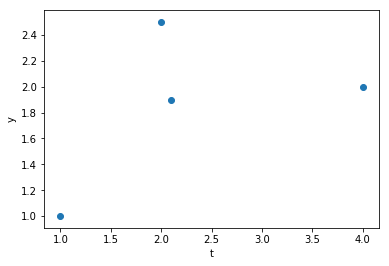

In [70]:
plt.figure()
plt.scatter(tvals,yvals)
plt.xlabel("t")
plt.ylabel("y")
plt.show()
plt.close()

In [71]:
class monotone_invert:
    def __init__(self,knots):
        self.tvals=numpy.array([t for t,_ in knots])
        self.yvals=numpy.array([y for _,y in knots])
        self.N=len(knots)
        self.L=numpy.tril(numpy.ones(shape=(self.N,self.N)),k=0)
        def objective(d):
            error=self.yvals-self.L.dot(d)
            return 0.5*error.dot(error)
        
        def jacobian(d):
            error=self.yvals-self.L.dot(d)
            return self.L.T.dot(error)
        
        def hessian(d):
            return self.L.T*dot(self.L)
        
        print(self.N)
        constraints={"type":"ineq","fun":lambda x:x}
        res=scipy.optimize.minimize(objective,self.yvals,method="COBYLA",jac=jacobian,hessp=hessian,constraints=constraints)
        print(res)
        d_best=res.x
        self.y_approx_vals=self.L.dot(d_best)
        print(self.y_approx_vals)
        
        self.linapprox=scipy.interpolate.interp1d(self.tvals,self.y_approx_vals,copy=True,bounds_error=True)
        
    def invert(self,yval):
        if not (min(self.y_approx_vals)<yval<max(self.y_approx_vals)):
            return numpy.nan
        
        tval=scipy.optimize.brentq(lambda x:self.linapprox(x)-yval,min(self.tvals),max(self.tvals))
        return tval
            
        
    
        
test=monotone_invert(knots)

4
     fun: 0.10333338033924057
   maxcv: 3.9302328752599825e-19
 message: 'Optimization terminated successfully.'
    nfev: 133
  status: 1
 success: True
       x: array([ 9.99914525e-01,  1.13358881e+00,  4.81482486e-35, -3.93023288e-19])
[0.99991452 2.13350334 2.13350334 2.13350334]


C:\Users\richa\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:502: RuntimeWarning: Method COBYLA does not use gradient information (jac).
  RuntimeWarning)
C:\Users\richa\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:513: RuntimeWarning: Method COBYLA does not use Hessian-vector product information (hessp).
  'information (hessp).' % method, RuntimeWarning)


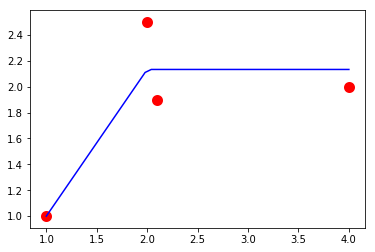

1.5293678516346076
1.6


In [72]:
plt.figure()
t_space=numpy.linspace(start=1,stop=4)
y_approx=test.linapprox(t_space)
plt.scatter(test.tvals,test.yvals,color="red",linewidth=5)
plt.plot(t_space,y_approx,color="blue")
plt.show()
plt.close()

pre_image=test.invert(1.6)
print(pre_image)
print(test.linapprox(pre_image))